In [1]:
#importing necessary librariesne
import pandas as pd
import numpy as np
import os,sys
import re

In [2]:
#X is the data in each document and Y is the folder name which are the class names
X=[]
Y=[]
for folder in os.listdir("20_newsgroups"):
    for document in os.listdir("20_newsgroups/" + folder):
        with open("20_newsgroups/" + folder + "/" + document,'r',encoding="latin-1") as f:
            X.append((document,f.read()))
            Y.append(folder)

In [3]:
print(len(X))
print(len(Y))

19997
19997


In [4]:
#Splitting the data into train and test
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

14997
5000
14997
5000


In [5]:
#Describing the structure of the data
print(x_train[0][1])

Newsgroups: talk.religion.misc
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!zaphod.mps.ohio-state.edu!uwm.edu!linac!uchinews!quads!dsoconne
From: dsoconne@quads.uchicago.edu (Daniel S OConnell)
Subject: Re: Religion and homosexuality
Message-ID: <1993Apr5.182411.7621@midway.uchicago.edu>
Keywords: being liberal
Sender: news@uchinews.uchicago.edu (News System)
Reply-To: dsoconne@midway.uchicago.edu
Organization: University of Chicago
References: <1993Apr1.224629.23457@magnus.acs.ohio-state.edu>
Distribution: usa
Date: Mon, 5 Apr 1993 18:24:11 GMT
Lines: 32

> magarret@magnus.acs.ohio-state.edu (COMPUTER DUDETTE) writes:

>I just recently realized that I am bisexual, and also just recently returned to
>religion, and have a good friend who has pointed out to me that homosexuality
>is a sin in the bible.  Well, I don't see how it could be considered a sin,

First of all as far as I know, only male homosexuality is exp

In [6]:
#Stopwords

stopwords=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [7]:
#Creating a dictionary of words and their frequency
dic={}
for i in range(len(x_train)):
    words = x_train[i][1].lower()
    stripped_words = re.split(r'\W+',words)
    for s in stripped_words:
        if not(s.isalpha()) or s in stopwords or len(s)<=2:
            continue
        elif s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'newsgroups': 15312,
 'talk': 9124,
 'religion': 3919,
 'misc': 8789,
 'path': 15283,
 'cantaloupe': 19513,
 'srv': 24203,
 'cmu': 39219,
 'edu': 123205,
 'crabapple': 4638,
 'ece': 4031,
 'europa': 4065,
 'eng': 5161,
 'gtefsd': 4050,
 'com': 37928,
 'howland': 8180,
 'reston': 8134,
 'ans': 8249,
 'net': 18991,
 'zaphod': 6190,
 'mps': 6872,
 'ohio': 11880,
 'state': 13994,
 'uwm': 1380,
 'linac': 350,
 'uchinews': 192,
 'quads': 45,
 'dsoconne': 5,
 'uchicago': 521,
 'daniel': 306,
 'oconnell': 1,
 'subject': 16228,
 'homosexuality': 414,
 'message': 16486,
 'midway': 354,
 'keywords': 1150,
 'liberal': 151,
 'sender': 8219,
 'news': 25752,
 'system': 4790,
 'reply': 3189,
 'organization': 14889,
 'university': 7443,
 'chicago': 469,
 'references': 9695,
 'magnus': 996,
 'acs': 1440,
 'distribution': 3544,
 'usa': 2582,
 'date': 15593,
 'mon': 1496,
 'apr': 15365,
 'gmt': 13323,
 'lines': 15689,
 'magarret': 1,
 'computer': 2898,
 'dudette': 1,
 'writes': 10950,
 'just': 7449,
 're

In [8]:
#Sorting words in descending order of their frequency
import operator
sorted_dict = sorted(dic.items(),key = operator.itemgetter(1),reverse = True)
sorted_dict

[('edu', 123205),
 ('cmu', 39219),
 ('com', 37928),
 ('news', 25752),
 ('not', 24780),
 ('srv', 24203),
 ('cantaloupe', 19513),
 ('net', 18991),
 ('message', 16486),
 ('subject', 16228),
 ('lines', 15689),
 ('date', 15593),
 ('apr', 15365),
 ('newsgroups', 15312),
 ('path', 15283),
 ('can', 14990),
 ('organization', 14889),
 ('state', 13994),
 ('gmt', 13323),
 ('ohio', 11880),
 ('one', 11704),
 ('will', 11458),
 ('writes', 10950),
 ('article', 10036),
 ('comp', 9877),
 ('references', 9695),
 ('talk', 9124),
 ('misc', 8789),
 ('ans', 8249),
 ('sender', 8219),
 ('howland', 8180),
 ('reston', 8134),
 ('don', 7896),
 ('like', 7731),
 ('people', 7623),
 ('just', 7449),
 ('university', 7443),
 ('posting', 7358),
 ('nntp', 7033),
 ('mps', 6872),
 ('know', 6758),
 ('host', 6727),
 ('sci', 6686),
 ('get', 6516),
 ('usenet', 6260),
 ('zaphod', 6190),
 ('think', 6050),
 ('may', 6015),
 ('alt', 5891),
 ('windows', 5852),
 ('politics', 5835),
 ('also', 5678),
 ('time', 5262),
 ('rutgers', 5233),
 (

(0.0, 4000.0, 0.0, 5000.0)

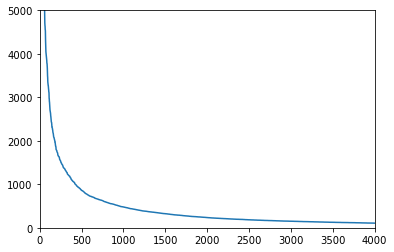

In [9]:
#Plotting a graph between words and their frequency
import matplotlib.pyplot as plt
words=[]
freq=[]
for i in range(len(sorted_dict)):
    words.append(i)
    freq.append(sorted_dict[i][1])
plt.plot(words,freq)
plt.axis([0,4000,0,5000])

In [10]:
#taking the top 2000 words with maximum frequency
features = [sorted_dict[i][0] for i in range(2000)]
features

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'like',
 'people',
 'just',
 'university',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'usenet',
 'zaphod',
 'think',
 'may',
 'alt',
 'windows',
 'politics',
 'also',
 'time',
 'rutgers',
 'harvard',
 'eng',
 'near',
 'use',
 'new',
 'rec',
 'system',
 'good',
 'sei',
 'noc',
 'crabapple',
 'well',
 'soc',
 'das',
 'xref',
 'now',
 'cis',
 'even',
 'see',
 'europa',
 'gtefsd',
 'ece',
 'way',
 'uunet',
 'world',
 'god',
 'org',
 'religion',
 'make',
 'two',
 'much',
 'first',
 'say',
 'christian',
 'many',
 'gov',
 'rochester',
 'right',
 'max',
 'distribution',
 'space',
 'club',
 'andrew',
 'mail',
 'want',
 'gatech',
 'udel',
 'anyone',

In [11]:
#Creating dataset using the above words as features
def create_dataset(dataset):
    data = np.zeros([len(dataset),len(features)],int)
    for i in range(len(dataset)):
        words_in_row = dataset[i][1].lower()
        word = re.split(r'\W+',words_in_row)
        for w in word:
            if w in features:
                data[i][features.index(w)]+=1
    return data

In [12]:
#Showing a glimpse of the training dataset
train_dataset = create_dataset(x_train)
train_dataset

array([[12,  3,  1, ...,  0,  0,  0],
       [ 9,  3,  0, ...,  0,  0,  0],
       [ 7,  3,  1, ...,  0,  0,  0],
       ...,
       [12,  2,  0, ...,  0,  0,  0],
       [ 5,  1,  2, ...,  0,  0,  0],
       [11,  1,  0, ...,  0,  0,  0]])

In [13]:
#Showing a glimpse of the testing dataset
test_dataset = create_dataset(x_test)
test_dataset

array([[ 5,  3,  6, ...,  0,  0,  0],
       [10,  4,  7, ...,  0,  0,  0],
       [ 5,  3,  5, ...,  0,  0,  0],
       ...,
       [13,  2,  2, ...,  0,  0,  0],
       [12,  1,  0, ...,  0,  0,  0],
       [ 9,  1,  1, ...,  0,  0,  0]])

In [14]:
print(train_dataset.shape)
print(test_dataset.shape)

(14997, 2000)
(5000, 2000)


In [39]:
#Fitting function - Creating Dictionary 
def fit(x,y):
    dic={}
    y = np.array(y)
    dis_val = set(y)
    wordcount=0
    for val in dis_val:
        dic[val]={}
        current = (y==val)
        x_train_current = x[current]
        total_word_sum=0
        for f in features: 
            dic[val][f] = (x_train_current[:,features.index(f)]).sum()
            total_word_sum += dic[val][f]
        dic[val]["total_words"] = total_word_sum
        wordcount+=dic[val]["total_words"]
    dic["word_count"] = wordcount
    return dic

In [52]:
#Calculating probability for current class
def probability(current,dictionary,x):
    output = np.log(dictionary[current]["total_words"])-np.log(dictionary["word_count"])
    for i in range(len(features)):
        xi=x[i]
        if xi==0:
            continue
        num = dictionary[current][features[i]]+1
        den = dictionary[current]["total_words"]+len(dictionary[current].keys())-1
        p = np.log(num)-np.log(den)
        output += p
    return output

In [58]:
#Calculating best probability and best class
def predict_class(dictionary,x):
    best_prob=-1000
    best_class=-1
    first_run=True
    for current in dictionary.keys():
        if current=='word_count':
            continue
        temp = probability(current,dictionary,x)
        if(first_run or temp>best_prob):
            best_prob = temp
            best_class = current
        first_run = False
    return best_class

In [19]:
#Calculating best class for each tuple
def predict(dictionary,x_test):
    predictions=[]
    for x in x_test:
        pred = predict_class(dictionary,x)
        predictions.append(pred)
    return predictions

In [65]:
#Calculating score
def score(y_test,y_pred):
    count=0
    for i in range(len(y_pred)):
        if y_pred[i]==y_test[i]:
            count+=1
    score = count/len(y_pred)
    return score

In [40]:
#Fitting the training data
dictionary = fit(train_dataset,y_train)

In [41]:
dictionary

{'comp.os.ms-windows.misc': {'edu': 5711,
  'cmu': 1829,
  'com': 1510,
  'news': 1271,
  'not': 749,
  'srv': 1204,
  'cantaloupe': 989,
  'net': 982,
  'message': 825,
  'subject': 783,
  'lines': 787,
  'date': 782,
  'apr': 593,
  'newsgroups': 768,
  'path': 806,
  'can': 638,
  'organization': 741,
  'state': 599,
  'gmt': 672,
  'ohio': 537,
  'one': 338,
  'will': 462,
  'writes': 381,
  'article': 324,
  'comp': 1988,
  'references': 420,
  'talk': 22,
  'misc': 1207,
  'ans': 421,
  'sender': 394,
  'howland': 412,
  'reston': 413,
  'don': 299,
  'like': 335,
  'people': 112,
  'just': 281,
  'university': 432,
  'posting': 334,
  'nntp': 334,
  'mps': 335,
  'know': 301,
  'host': 320,
  'sci': 14,
  'get': 290,
  'usenet': 313,
  'zaphod': 284,
  'think': 192,
  'may': 350,
  'alt': 155,
  'windows': 3144,
  'politics': 0,
  'also': 200,
  'time': 161,
  'rutgers': 29,
  'harvard': 247,
  'eng': 228,
  'near': 262,
  'use': 385,
  'new': 174,
  'rec': 8,
  'system': 309,
 

In [59]:
#Predictions on testing data
test_predictions = predict(dictionary,test_dataset)

In [61]:
test_predictions

['sci.med',
 'talk.politics.guns',
 'rec.autos',
 'comp.os.ms-windows.misc',
 'talk.politics.misc',
 'talk.politics.misc',
 'rec.autos',
 'sci.crypt',
 'sci.crypt',
 'comp.sys.ibm.pc.hardware',
 'sci.space',
 'alt.atheism',
 'sci.crypt',
 'rec.autos',
 'misc.forsale',
 'talk.politics.guns',
 'talk.politics.mideast',
 'misc.forsale',
 'comp.sys.ibm.pc.hardware',
 'comp.graphics',
 'misc.forsale',
 'comp.windows.x',
 'rec.sport.baseball',
 'talk.politics.mideast',
 'talk.politics.misc',
 'sci.med',
 'talk.politics.guns',
 'rec.sport.baseball',
 'talk.politics.misc',
 'sci.electronics',
 'rec.autos',
 'talk.religion.misc',
 'sci.electronics',
 'rec.motorcycles',
 'alt.atheism',
 'sci.electronics',
 'comp.sys.ibm.pc.hardware',
 'talk.politics.misc',
 'comp.sys.mac.hardware',
 'rec.sport.baseball',
 'talk.politics.guns',
 'rec.sport.hockey',
 'comp.graphics',
 'comp.sys.mac.hardware',
 'comp.os.ms-windows.misc',
 'alt.atheism',
 'sci.electronics',
 'talk.politics.mideast',
 'rec.autos',
 's

In [66]:
#Score between predictions and true values
score(y_test,test_predictions)

0.8712

In [73]:
#Predictions on training data
train_predictions = predict(dictionary,train_dataset)
score(y_train,train_predictions)

0.9039807961592319

In [67]:
#Using the inbuilt Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [72]:
#Fitting the inbuilt classifier and predicting scores
clf = MultinomialNB()
clf.fit(train_dataset,y_train)
y_pred = clf.predict(test_dataset)
y_pred = y_pred.reshape(-1,1)
clf.score(test_dataset,y_test)

0.8574

In [76]:
#Comparing the scores
print("Score of the inbuilt Classifier:")
print("Score of the training data:", clf.score(train_dataset,y_train))
print("Score of the testing data:", clf.score(test_dataset,y_test))
print("Classification Report:", metrics.classification_report(y_test,y_pred))
print("---------------------------------------------------")
print("Score of the self implemented Classifier:")
print("Score of the training data:", score(y_train,train_predictions))
print("Score of the testing data:", score(y_test,test_predictions))
print("Classification Report:", metrics.classification_report(y_test,test_predictions))

Score of the inbuilt Classifier:
Score of the training data: 0.8889777955591118
Score of the testing data: 0.8574
Classification Report:                           precision    recall  f1-score   support

             alt.atheism       0.81      0.82      0.81       261
           comp.graphics       0.89      0.74      0.81       242
 comp.os.ms-windows.misc       0.78      0.83      0.81       246
comp.sys.ibm.pc.hardware       0.82      0.78      0.80       262
   comp.sys.mac.hardware       0.77      0.88      0.82       252
          comp.windows.x       0.88      0.76      0.82       241
            misc.forsale       0.77      0.94      0.85       253
               rec.autos       0.86      0.90      0.88       233
         rec.motorcycles       0.89      0.94      0.91       234
      rec.sport.baseball       0.95      0.90      0.92       242
        rec.sport.hockey       0.94      0.95      0.94       260
               sci.crypt       0.98      0.95      0.96       242
    